In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
# fix random seed for reproducbility
seed=7
#Load the dataset
forestfire=pd.read_csv("D:/Data Secience/Assignment/Neural Networks/forestfires.csv")


In [3]:
forestfire.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


## Exploratory Data Analysis

In [4]:
forestfire_df=forestfire.copy()

In [5]:
forestfire_df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [6]:
forestfire_df1=forestfire_df.drop(['dayfri','daymon','daysat','daysun','daytue','daywed','monthapr','monthaug','monthfeb','monthjan','monthjul','monthjun','monthmar','monthmay','monthnov','monthoct','monthsep','daythu','monthdec','size_category'], axis=1)

In [7]:
forestfire_df1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [8]:
forestfire_df1.shape

(517, 11)

In [9]:
#Duplicates
forestfire_df1[forestfire_df1.duplicated()].shape

(8, 11)

In [10]:
forestfire_df1=forestfire_df1.drop_duplicates()

In [11]:
forestfire_df1[forestfire_df1.duplicated()].shape

(0, 11)

<AxesSubplot:>

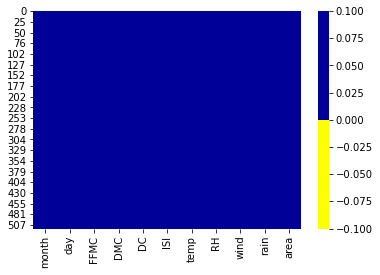

In [12]:
#Missing Values and Imputation
import seaborn as sns
cols=forestfire_df1.columns
colours=['#ffff00','#000099']
sns.heatmap(forestfire_df1[cols].isnull(),
            cmap=sns.color_palette(colours))

In [13]:
forestfire_df1.isnull().sum()

month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [14]:
forestfire_df1.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,90.618075,110.235756,547.787623,9.023576,18.865422,44.253438,4.011395,0.020432,12.992908
std,5.555527,63.804112,248.196222,4.585083,5.841083,16.365192,1.800926,0.296261,64.133357
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,62.300000,437.700000,6.400000,15.400000,32.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.610000
75%,92.900000,141.300000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.580000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [15]:
forestfire_df1.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382925,0.331956,0.531926,0.431744,-0.306262,-0.030409,0.052280,0.040998
DMC,0.382925,1.000000,0.681446,0.309459,0.470875,0.062772,-0.104563,0.071017,0.076932
DC,0.331956,0.681446,1.000000,0.229757,0.496608,-0.047971,-0.202856,0.033772,0.051542
ISI,0.531926,0.309459,0.229757,1.000000,0.395858,-0.135955,0.104834,0.062132,0.008429
temp,0.431744,0.470875,0.496608,0.395858,1.000000,-0.532503,-0.227754,0.067911,0.099173
RH,-0.306262,0.062772,-0.047971,-0.135955,-0.532503,1.000000,0.070721,0.094343,-0.074554
wind,-0.030409,-0.104563,-0.202856,0.104834,-0.227754,0.070721,1.000000,0.059332,0.012623
rain,0.052280,0.071017,0.033772,0.062132,0.067911,0.094343,0.059332,1.000000,-0.006511
area,0.040998,0.076932,0.051542,0.008429,0.099173,-0.074554,0.012623,-0.006511,1.000000


 ## Scatter Plot and Correlation Analysis

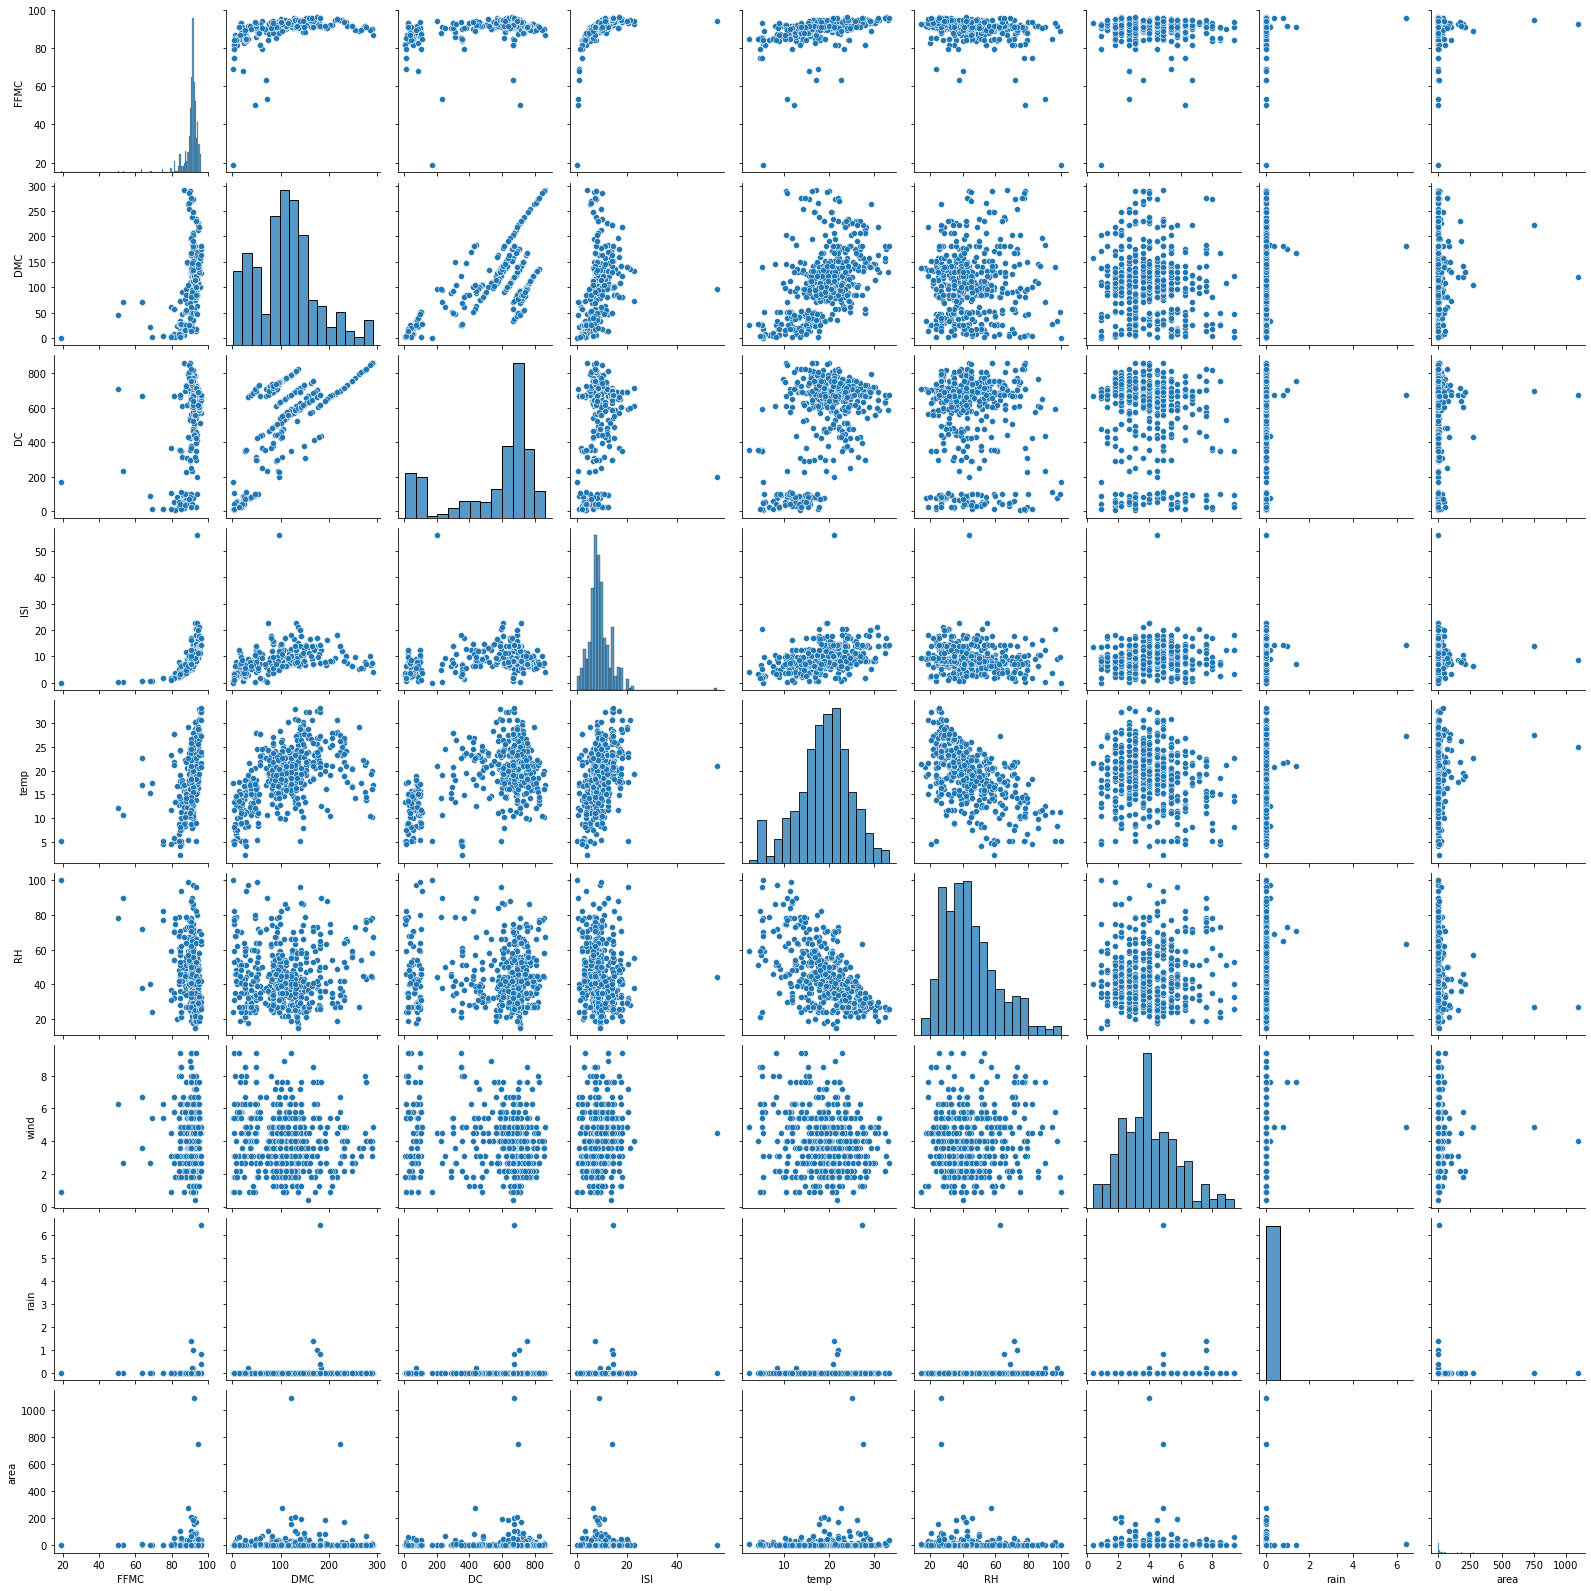

In [16]:
sns.pairplot(forestfire_df1)

In [17]:
import sweetviz as sv
sweet_report=sv.analyze(forestfire_df1)
sweet_report.show_html('Forestfire_EDA_Report.html')


Report Forestfire_EDA_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


 ## LabelEncoder

In [18]:
labelencoder=LabelEncoder()

In [19]:
cols=['month','day']

In [20]:
forestfire_df1[cols]=forestfire_df1[cols].apply(LabelEncoder().fit_transform)

In [21]:
forestfire_df1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


 ## Neural Network Model

In [22]:
# Fix random seed for reproducibility
seed=7
numpy.random.seed(seed)

In [23]:
forestfire_df1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


 ## Splitting data into Training and Testing dataset

In [24]:
x=forestfire_df1.iloc[:,0:10]
y=forestfire_df1['area']

In [25]:
x.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0


In [26]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.33, random_state=40)

In [36]:
#create model
model =keras.Sequential()
model.add(Dense(15, input_dim=10, activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 15)                165       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 336
Trainable params: 336
Non-trainable params: 0
_________________________________________________________________


In [79]:
#Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [80]:
# fit the model
history=model.fit(x,y, validation_split=0.33, epochs=125, batch_size=10)

Epoch 1/125
35/35 [==============================] - 1s 12ms/step - loss: 1325.3672 - accuracy: 0.0912 - val_loss: 4098.2534 - val_accuracy: 0.0536
Epoch 2/125
35/35 [==============================] - 0s 4ms/step - loss: 3755.2143 - accuracy: 0.0311 - val_loss: 4090.3691 - val_accuracy: 0.0476
Epoch 3/125
35/35 [==============================] - 0s 4ms/step - loss: 1787.1170 - accuracy: 0.0779 - val_loss: 4093.9888 - val_accuracy: 0.0476
Epoch 4/125
35/35 [==============================] - 0s 5ms/step - loss: 2475.8260 - accuracy: 0.0220 - val_loss: 4139.3208 - val_accuracy: 0.0655
Epoch 5/125
35/35 [==============================] - 0s 4ms/step - loss: 1310.5180 - accuracy: 0.1306 - val_loss: 4092.4119 - val_accuracy: 0.0417
Epoch 6/125
35/35 [==============================] - 0s 4ms/step - loss: 5980.6230 - accuracy: 0.0222 - val_loss: 4125.0806 - val_accuracy: 0.0595
Epoch 7/125
35/35 [==============================] - 0s 4ms/step - loss: 8689.2841 - accuracy: 0.0477 - val_loss: 410

In [81]:
# evaluate the model
scores=model.evaluate(x,y)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

16/16 [==============================] - 0s 1ms/step - loss: 3927.8806 - accuracy: 0.0334
accuracy: 3.34%


In [82]:
# Visualize training history
#list all datain history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [84]:
pred=model.predict(x_test)

In [85]:
from sklearn import metrics 

score=metrics.mean_squared_error(pred, y_test)
print("Final score (MSE):{}".format(score))

Final score (MSE):3850.148041030194


In [86]:
import numpy as np
score = np.sqrt(metrics.mean_squared_error(pred, y_test))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 62.0495611671041


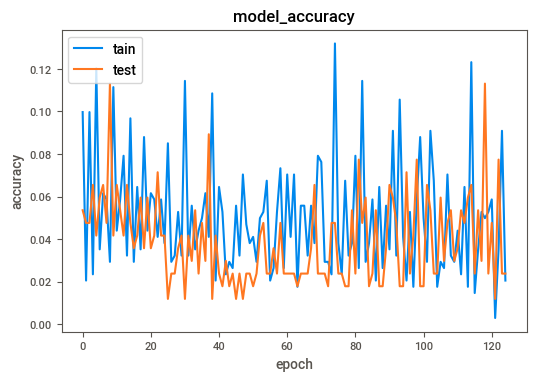

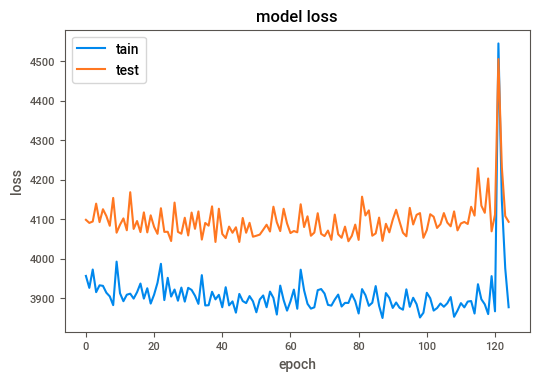

In [87]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['tain', 'test'], loc='upper left')
plt.show()

#summarize history for loss
plt.plot (history.history['loss'])
plt.plot (history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['tain','test'], loc='upper left')
plt.show()
        

 ## Interpretation
 
 ## The Burned area of forestfires is 3.34% according to our regression model.
 
 ### model_accuarcy grape- train and test accuracy same there is not diverting each other
 
 